In [2]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import dunestyle.matplotlib as dunestyle

/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


DUNE plot style enabled


In [3]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result


#LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [4]:
path = '/media/leoperes/Acer/Users/le0_p/'

In [5]:
def ReadNuclearModelSamples(IsBDM, massANDboost=None):
    #print(massANDboost)
    sampels=[]
    global LIST_NUCLEARMODELS
    if IsBDM:
        fBDM_00a = ROOT.TFile.Open(path+"ntuples_grid_newVertex/00a_newVertex/bdm_"+massANDboost+"_00a.root")
        if massANDboost != 'm20_b10':
            fBDM_01a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01a_newVertex/bdm_'+massANDboost+'_01a.root')
        fBDM_02a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02a_newVertex/bdm_'+massANDboost+'_02a.root')
        fBDM_00b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00b_newVertex/bdm_'+massANDboost+'_00b.root')
        fBDM_01b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01b_newVertex/bdm_'+massANDboost+'_01b.root')
        fBDM_02b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02b_newVertex/bdm_'+massANDboost+'_02b.root')
        if massANDboost != 'm20_b10':
            samples = [fBDM_00a, fBDM_01a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
            LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        else:
            samples = [fBDM_00a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
            LIST_NUCLEARMODELS = ['hA_BR', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        return samples
    if not IsBDM:
        LIST_NUCLEARMODELS = ['hA_BR','hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
        fAtm_00a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
        fAtm_01a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01a_newVertex/atm_hA_LFG.root')
        fAtm_02a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02a_newVertex/atm_hA_ESF.root')
        fAtm_00b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00b_newVertex/atm_hN_BR.root')
        fAtm_01b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/01b_newVertex/atm_hN_LFG.root')
        fAtm_02b = ROOT.TFile.Open(path+'ntuples_grid_newVertex/02b_newVertex/atm_hN_ESF.root')
        samples = [fAtm_00a, fAtm_01a, fAtm_02a, fAtm_00b, fAtm_01b, fAtm_02b]
        return samples

In [6]:
listsamples = ['m05_b1p1', 'm05_b1p5', 'm05_b10', 'm10_b1p1', 'm10_b1p5', 'm10_b10', 'm20_b1p1', 'm20_b1p5', 'm20_b10', 'm40_b1p1', 'm40_b1p5', 'm40_b10']
list_samples_latex = [r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=10$' ]
#list_nuclearmodels = ['hA_BR','hA_LSF', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [7]:

def GetBDTResponse(tree,xml_file):
    
    bdtOutput = []
    # in order to start TMVA
    ROOT.TMVA.Tools.Instance()
    reader = ROOT.TMVA.Reader("!Color:!Silent")
    
    event = array('f', [0])
    LongestTrack= array('f',[0])
    HighestTrackSummedADC= array('f',[0])
    PIDALongestTrack= array('f',[0])
    nTracks= array('f',[0])
    nShowers= array('f',[0])
    TotalMomentumP= array('f',[0])
    nSpacePoints= array('f',[0])
    NHits = array('f', [0])
    #NPrimaryDaughters= array('f',[0])
    HighestShowerSummedADC= array('f',[0])
    #PrimaryPDGReco= array('f',[0])
    LargeShowerOpenAngle= array('f',[0])
    LongestShower= array('f',[0])
    CosThetaDetTotalMom= array('f',[0])
    CosPhiDetTotalMom= array('f',[0])
    FracTotalChargeLongTrack= array('f',[0])
    AvarageTrackLength= array('f',[0])
    CVN_NCScore= array('f',[0])
    EventRecoEnergy_Charge = array('f',[0])
    EventRecoEnergy_numu = array('f',[0])
    EventRecoEnergy_nue = array('f',[0])
    #event = array('f',[0])
    
    #reader.AddSpectator("event", event)
    #reader.AddVariable("LongestTrack", LongestTrack)
    ##reader.AddVariable("log(HighestTrackSummedADC)", HighestTrackSummedADC)
    #reader.AddVariable("PIDALongestTrack", PIDALongestTrack)
    #reader.AddVariable("nTracks", nTracks)
    #reader.AddVariable("nShowers", nShowers)
    ##reader.AddVariable("TotalMomentumP", TotalMomentumP)
    #reader.AddVariable("NHits", NHits)
    ##reader.AddVariable("NPrimaryDaughters", NPrimaryDaughters)
    #reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC)
    ##reader.AddVariable("PrimaryPDGReco", PrimaryPDGReco)
    #reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle)
    #reader.AddVariable("LongestShower", LongestShower)
    ##reader.AddVariable("CosThetaDetTotalMom", CosThetaDetTotalMom)
    ##reader.AddVariable("CosPhiDetTotalMom", CosPhiDetTotalMom)
    #reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)
    ##reader.AddVariable("AvarageTrackLength", AvarageTrackLength)
    #reader.AddVariable("CVN_NCScore", CVN_NCScore)
    ##reader.AddVariable("EventRecoEnergy_Charge", EventRecoEnergy_Charge)
    ##reader.AddVariable("EventRecoEnergy_numu", EventRecoEnergy_numu)
    ##reader.AddVariable("EventRecoEnergy_nue", EventRecoEnergy_nue)
    ##reader.AddSpectator("event", event)
    
    reader.AddSpectator("event", event)
    reader.AddVariable("PIDALongestTrack", PIDALongestTrack) # PIDA of the longest track
    reader.AddVariable("nTracks", nTracks) # Number of tracks
    reader.AddVariable("nShowers", nShowers) # Number of showers
    reader.AddVariable("NHits", NHits) # Number of 3D space points
    reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC) # Highest Shower ADC
    reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle) # Large shower opening angle
    reader.AddVariable("LongestShower", LongestShower) # Longest shower in event
    reader.AddVariable("CVN_NCScore",CVN_NCScore) # CVN score for NC
    reader.AddVariable("LongestTrack", LongestTrack)
    reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)

    
    bdt_class_xml = xml_file 
    reader.BookMVA("TMVAClassification",bdt_class_xml)
    
    nentry = tree.GetEntries()
    
    for i in range(nentry):
        tree.GetEntry(i)
        #print(tree.NPrimaryDaughters)

        event[0] = float(tree.event)           
        LongestTrack[0] = float(tree.LongestTrack)
        #HighestTrackSummedADC[0] = float(tree.HighestTrackSummedADC)
        PIDALongestTrack[0] = float(tree.PIDALongestTrack)
        nTracks[0] = float(tree.nTracks)
        nShowers[0] = float(tree.nShowers)
        #TotalMomentumP[0] = float(tree.TotalMomentumP)
        NHits[0] = float(tree.NHits)
        #nSpacePoints[0] = float(tree.nSpacePoints)
        #NPrimaryDaughters[0] = float(tree.NPrimaryDaughters[0])
        HighestShowerSummedADC[0] = float(tree.HighestShowerSummedADC)
        #PrimaryPDGReco[0] = float(tree.PrimaryPDGReco[0])
        LargeShowerOpenAngle[0] = float(tree.LargeShowerOpenAngle)
        LongestShower[0] = float(tree.LongestShower)
        #CosThetaDetTotalMom[0] = float(tree.CosThetaDetTotalMom)
        #CosPhiDetTotalMom[0] = float(tree.CosPhiDetTotalMom)
        FracTotalChargeLongTrack[0] = float(tree.FracTotalChargeLongTrack)
        #AvarageTrackLength[0] = float(tree.AvarageTrackLength)
        CVN_NCScore[0] = float(tree.CVN_NCScore)
        #EventRecoEnergy_Charge[0] = float(tree.EventRecoEnergy_Charge)
        #EventRecoEnergy_numu[0] = float(tree.EventRecoEnergy_numu)
        #EventRecoEnergy_nue[0] = float(tree.EventRecoEnergy_nue)
           
        bdt = reader.EvaluateMVA("TMVAClassification")
        bdtOutput.append(bdt)
            
    return np.array(bdtOutput)

#BDTResponseAtm_ada = GetBDTResponse(fTree_atm, path+"TMVAClassification_BDTAtmCCNC_202503120817.weights.xml")
#BDTResponse_m10_b1p1_00a_ada = GetBDTResponse(fTree_m10_b1p1, path+"TMVAClassification_BDTAtmCCNC_202503120817.weights.xml")

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


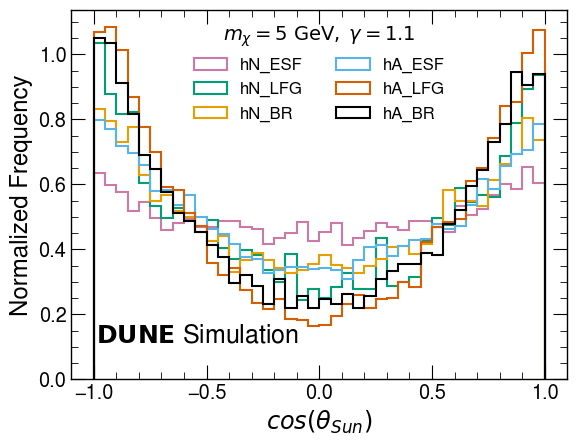

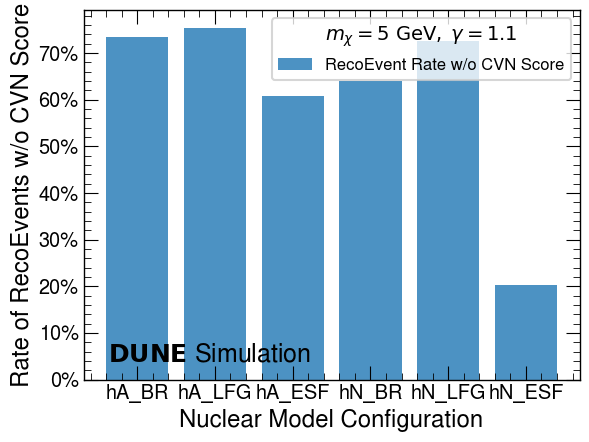

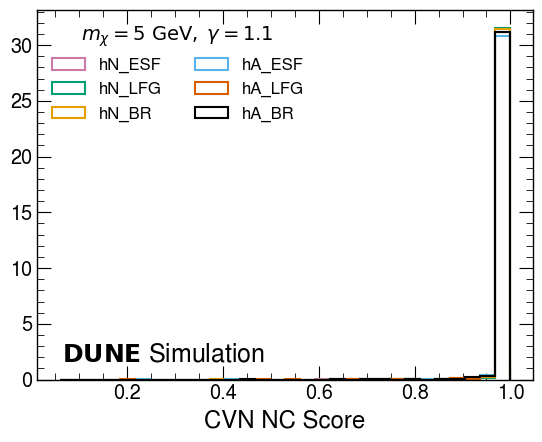

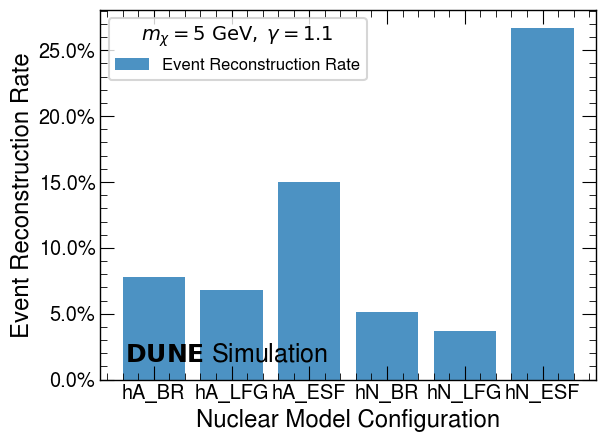

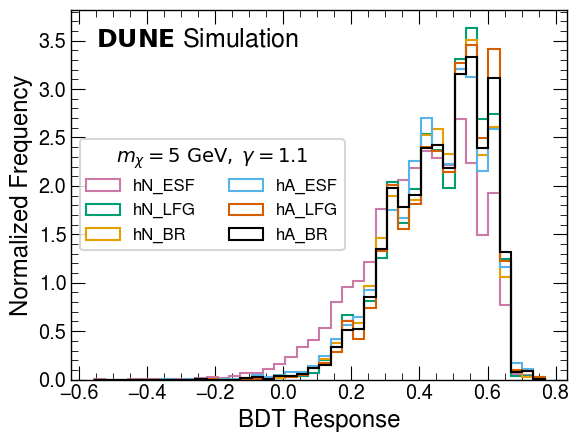

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


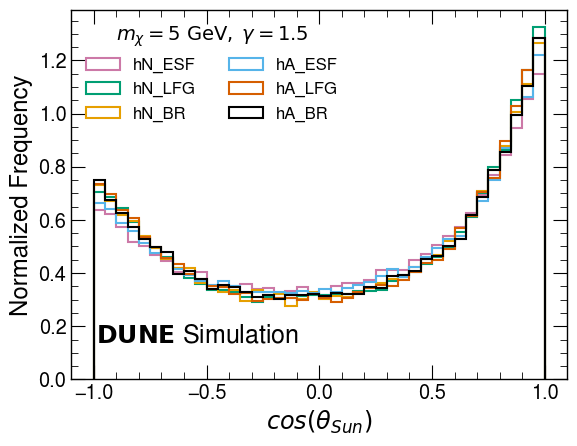

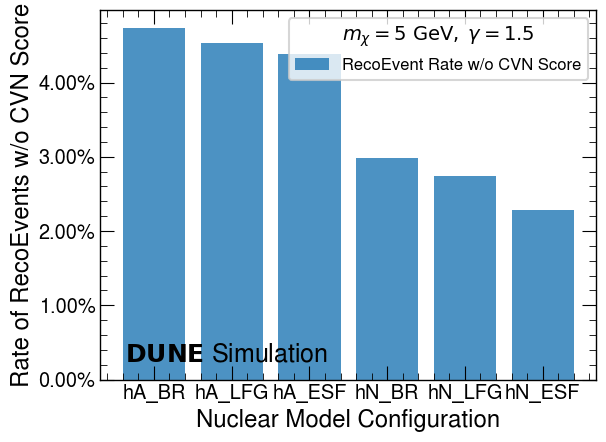

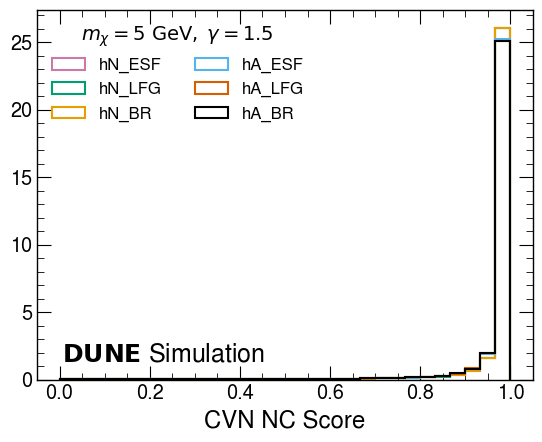

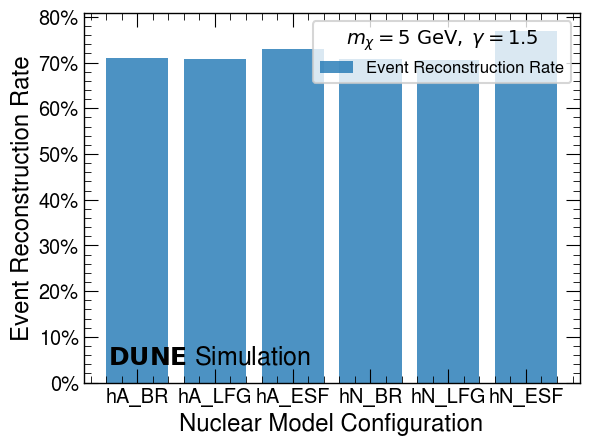

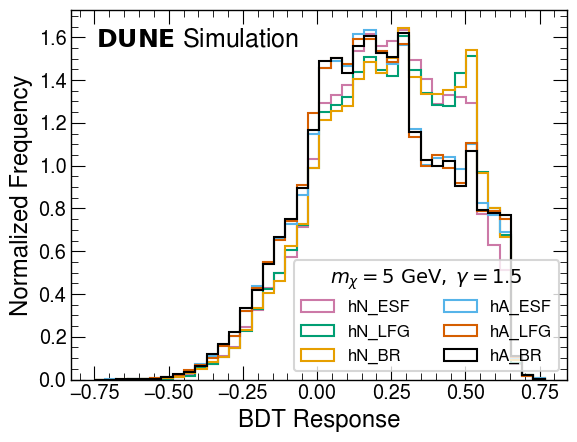

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


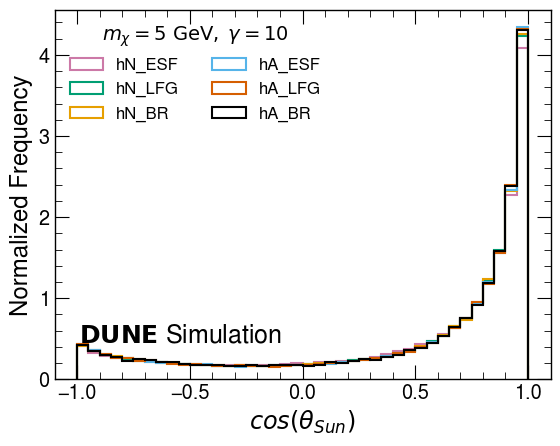

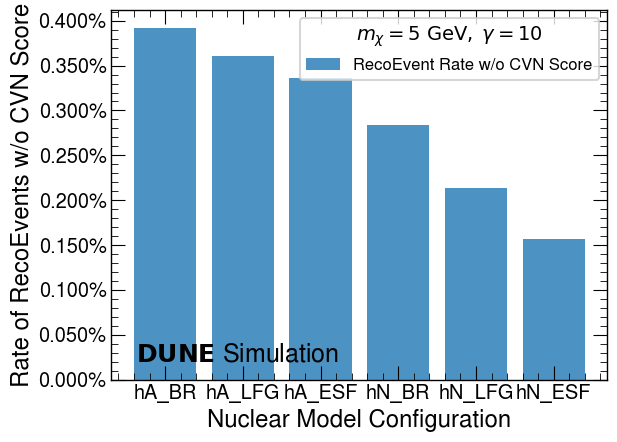

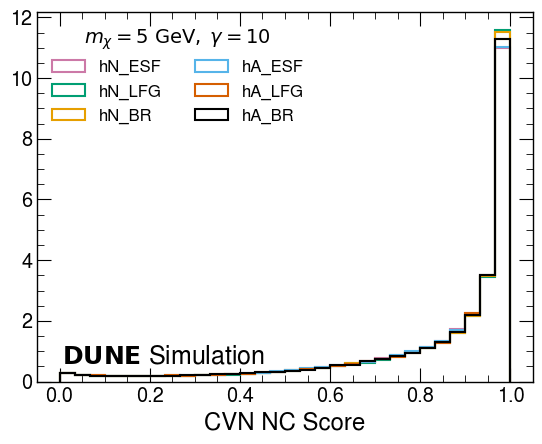

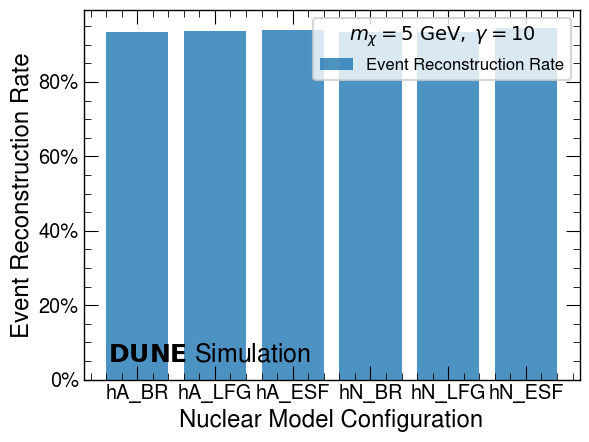

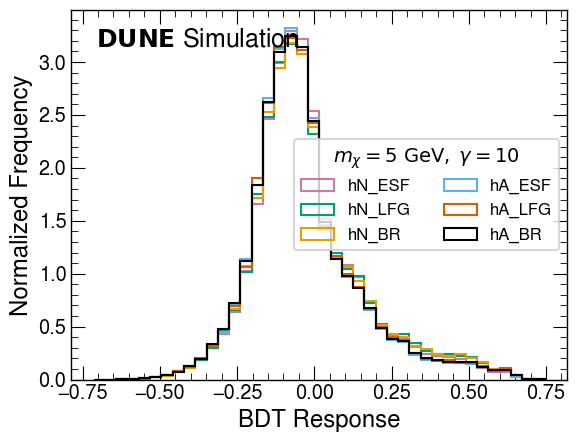

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


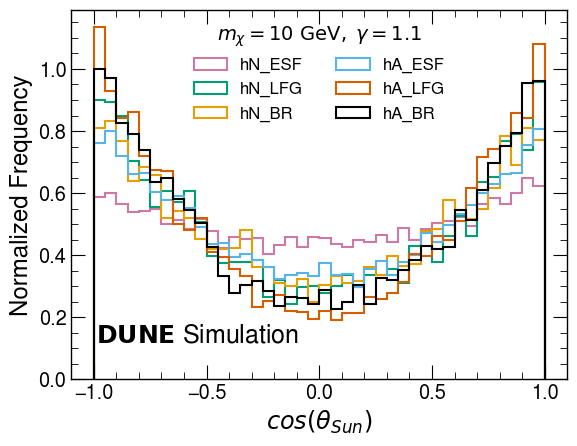

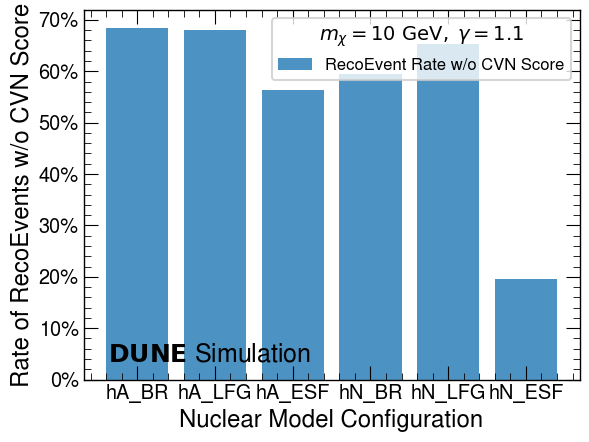

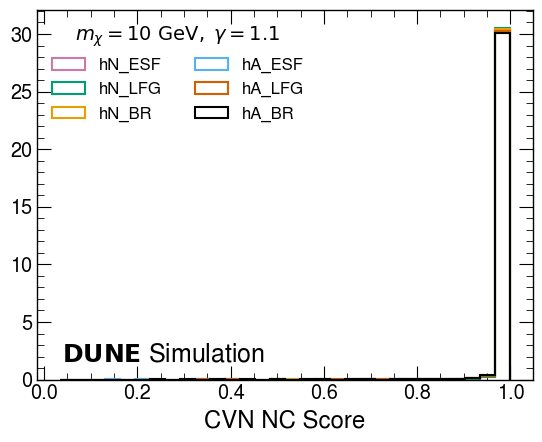

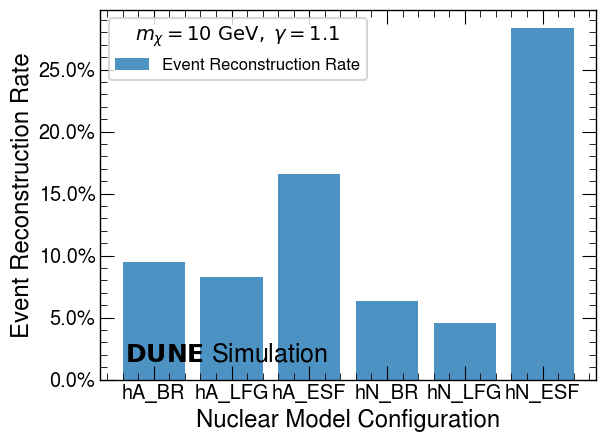

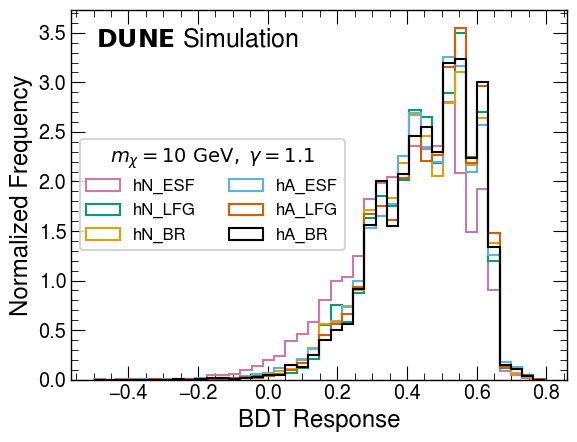

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


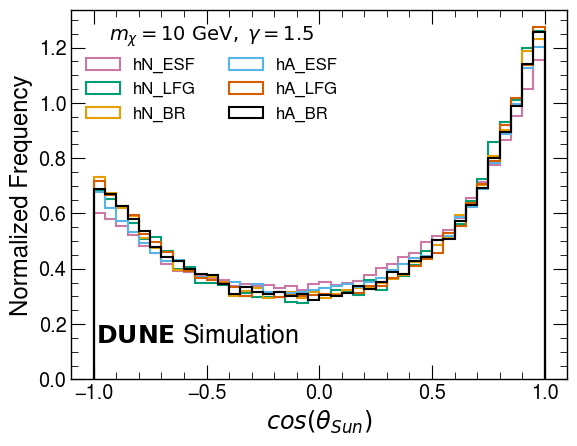

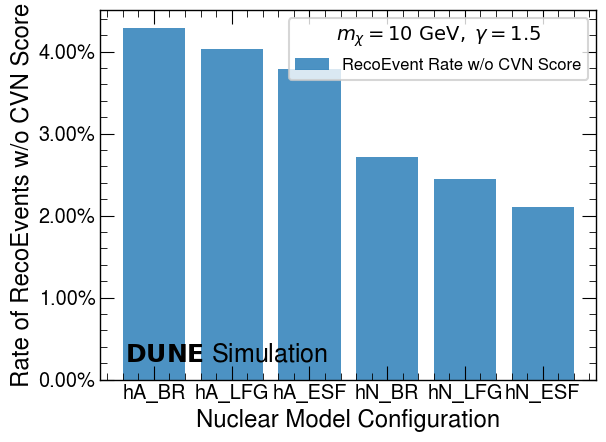

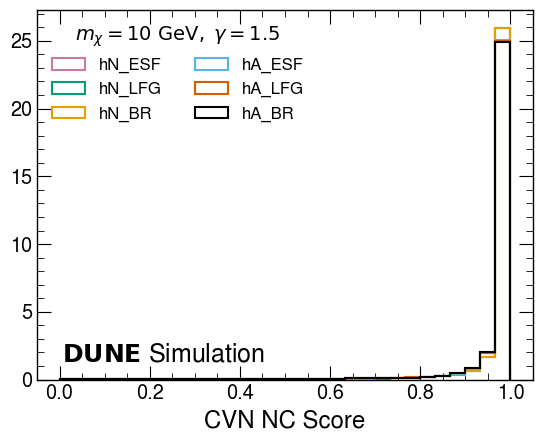

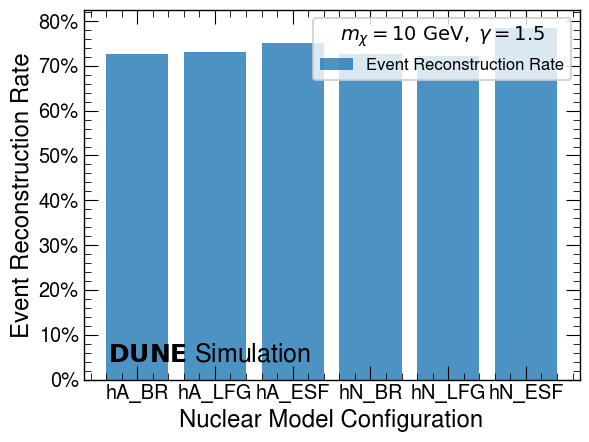

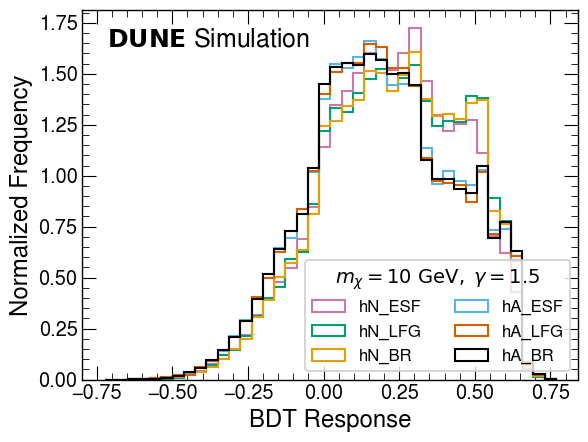

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


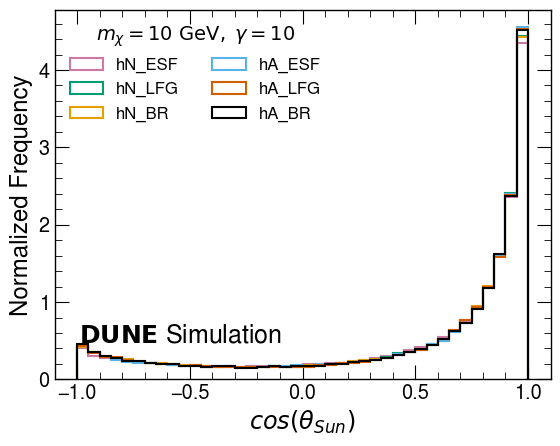

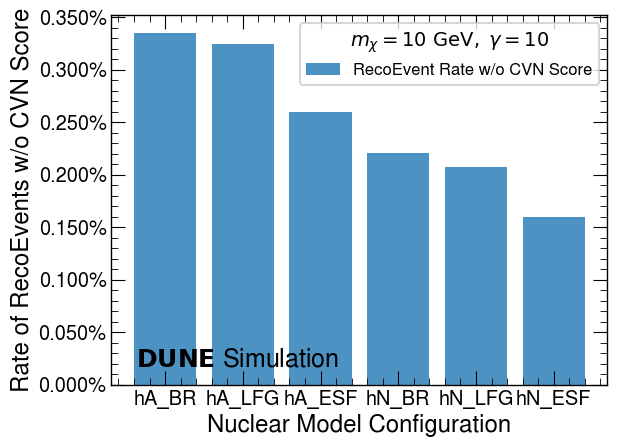

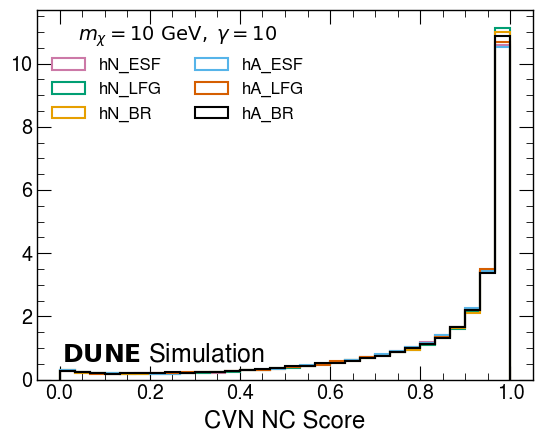

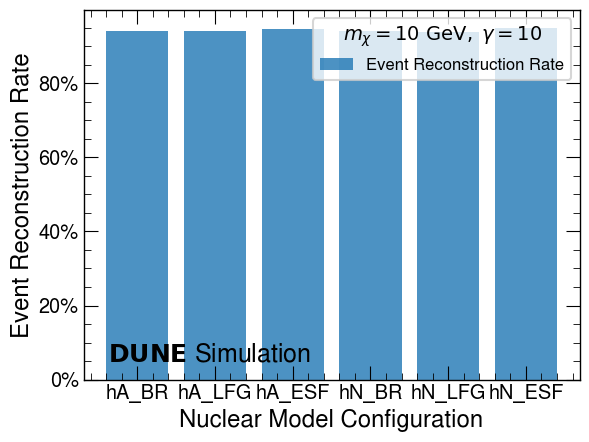

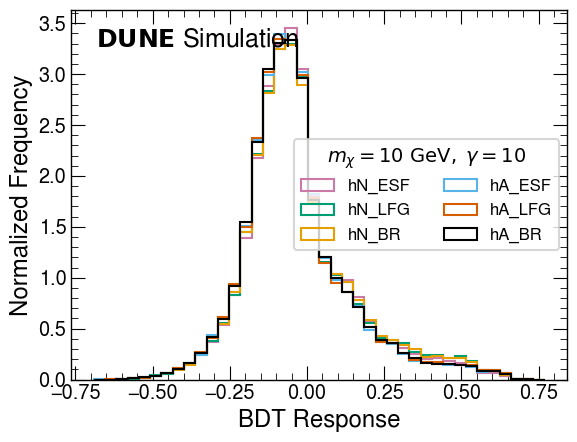

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


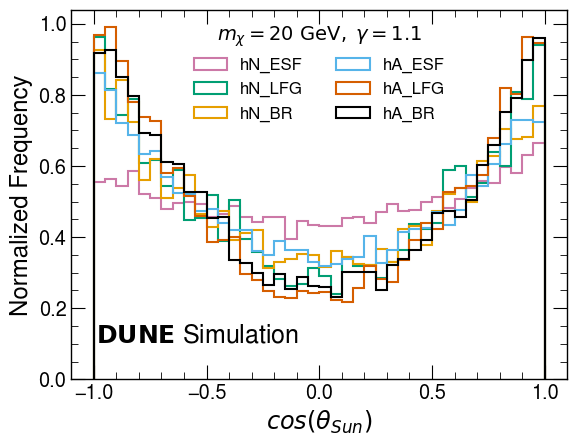

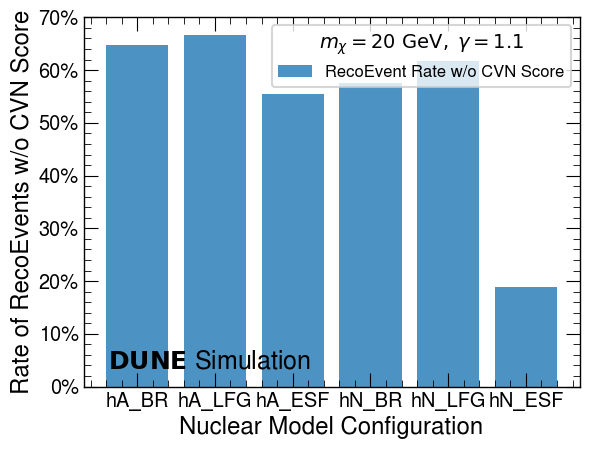

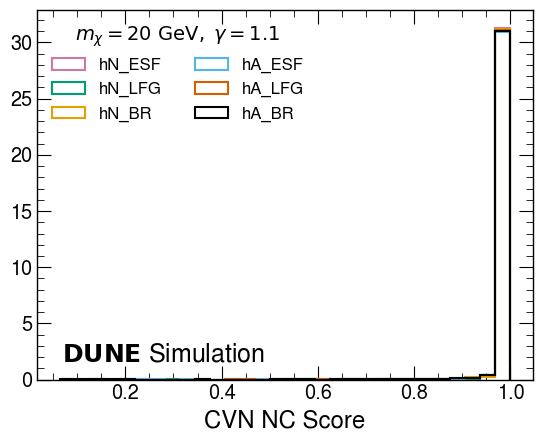

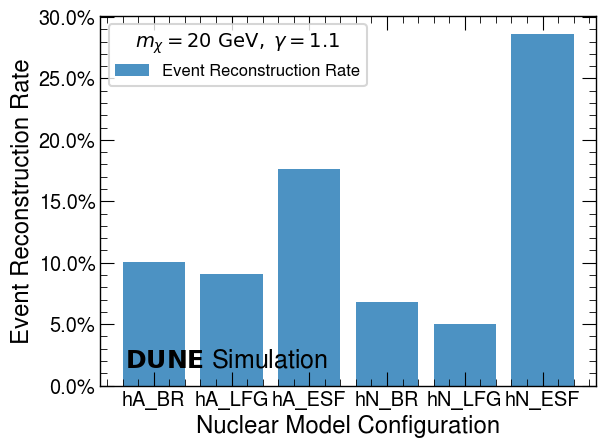

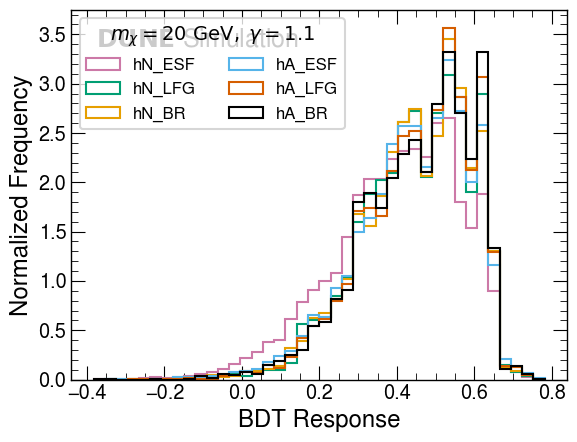

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


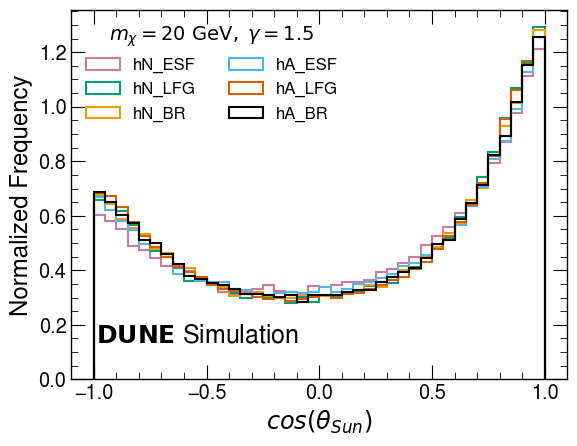

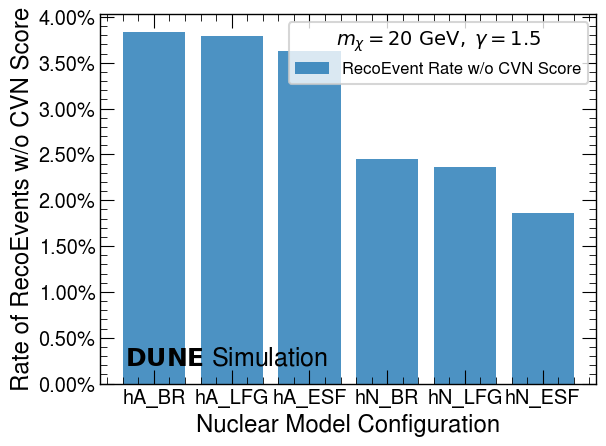

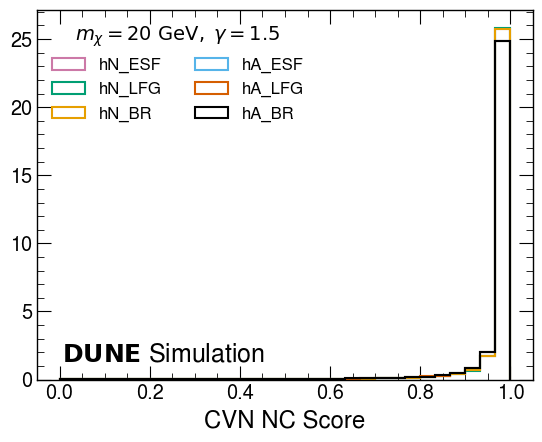

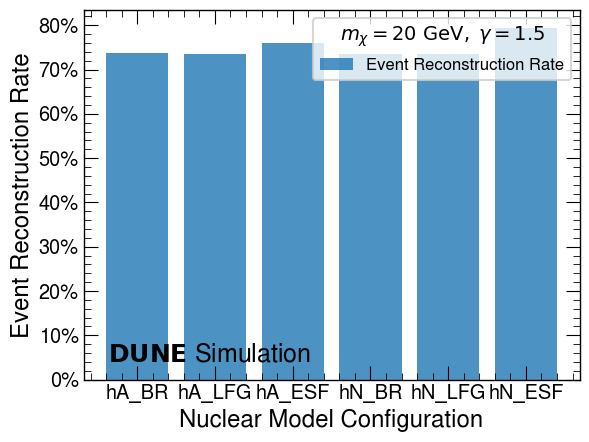

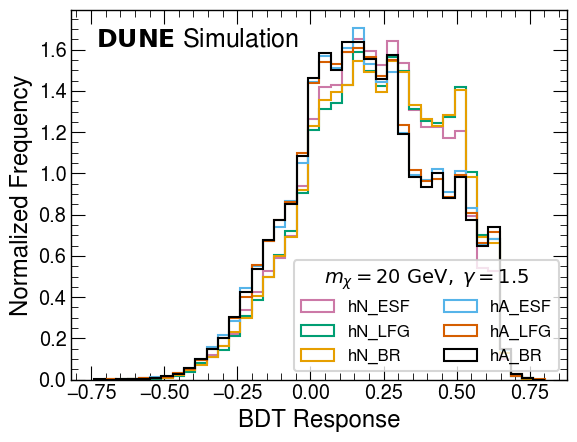

['hA_BR', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


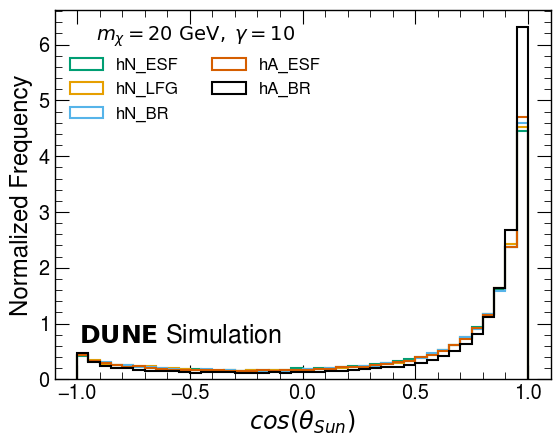

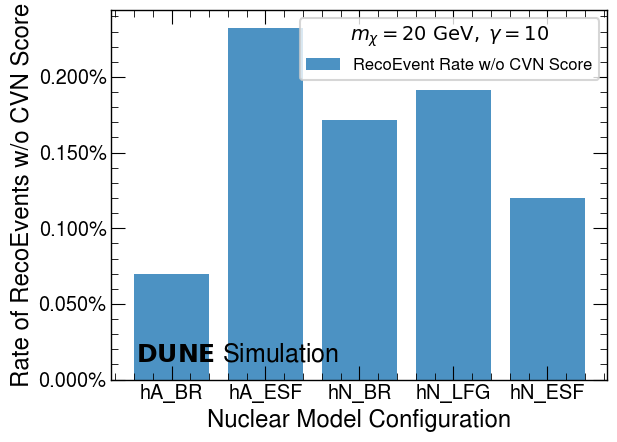

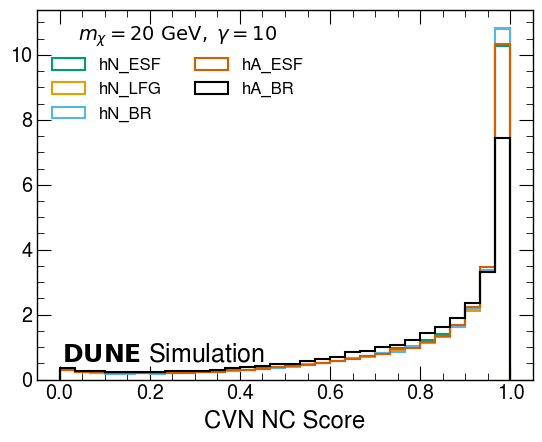

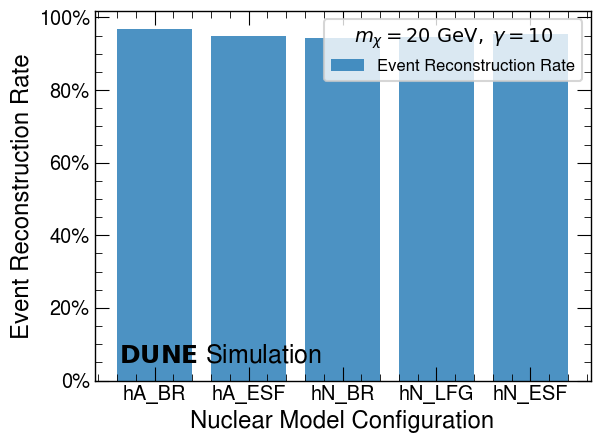

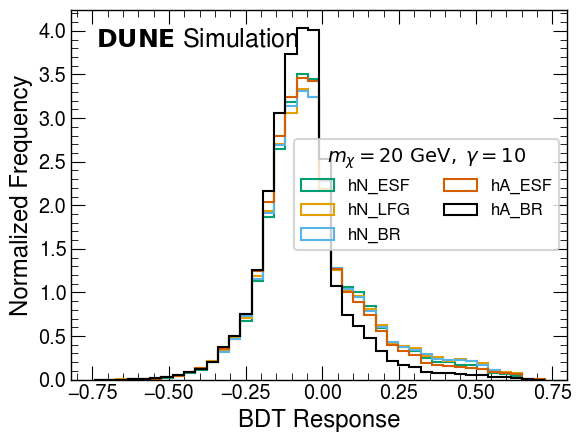

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


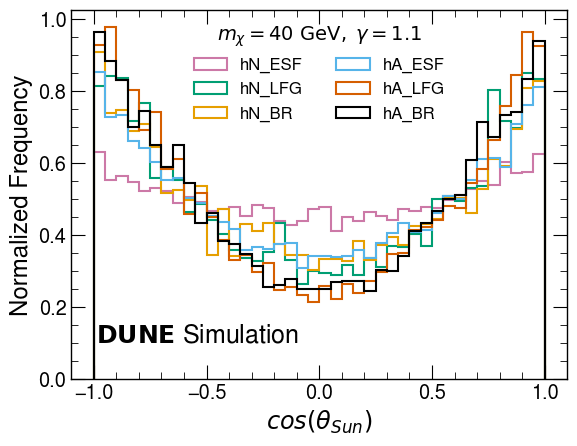

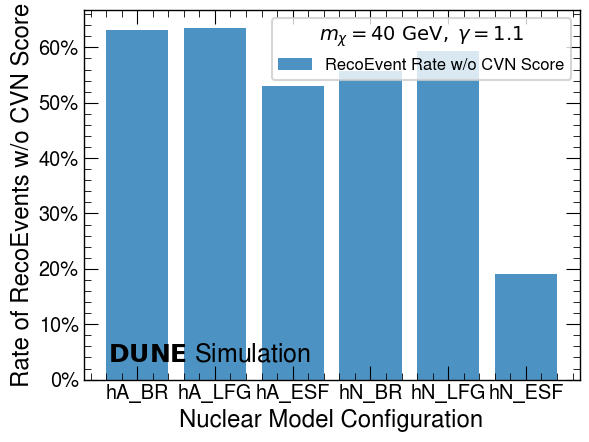

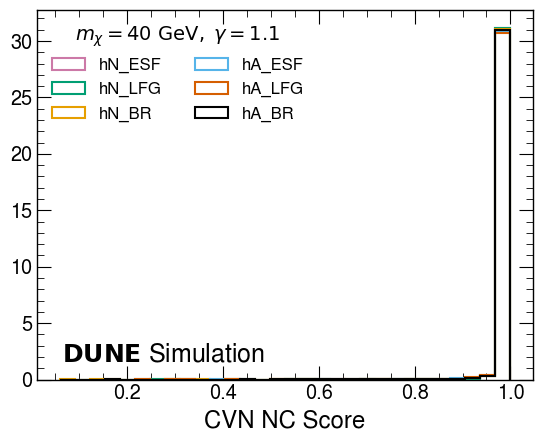

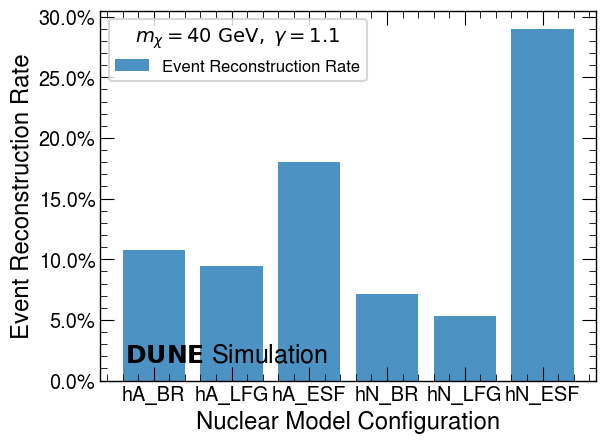

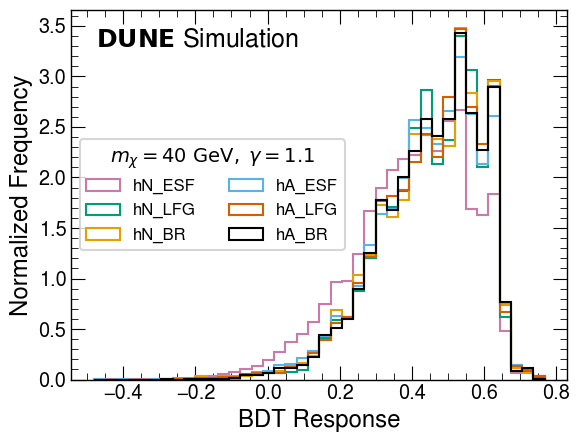

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


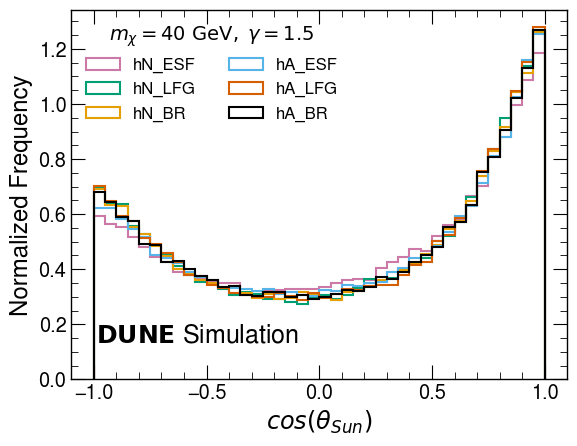

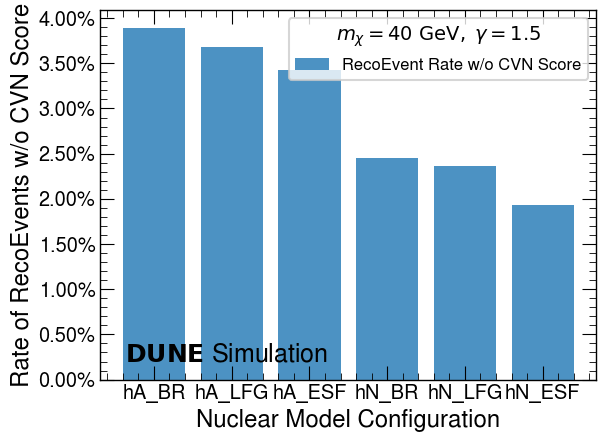

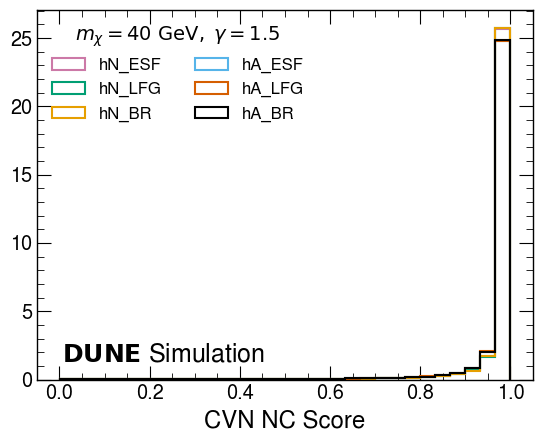

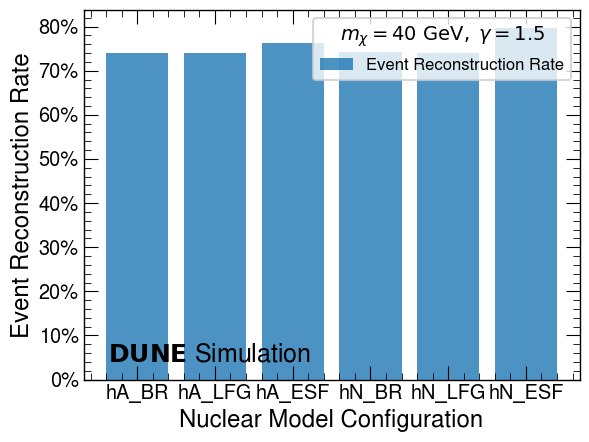

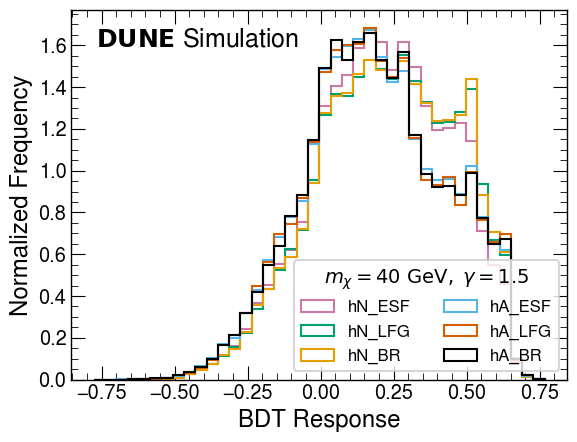

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']


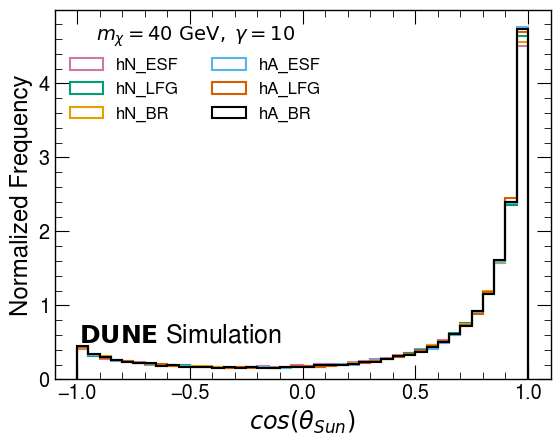

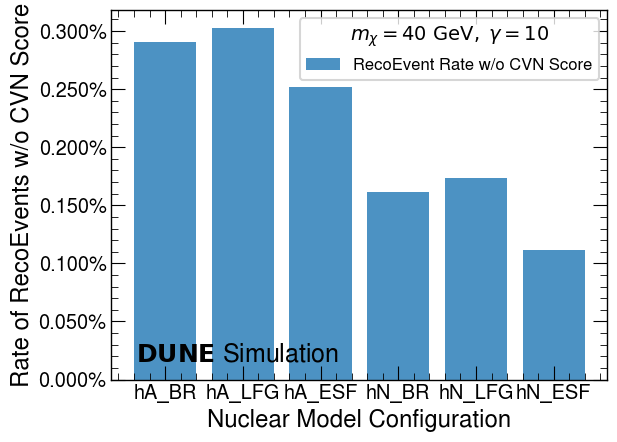

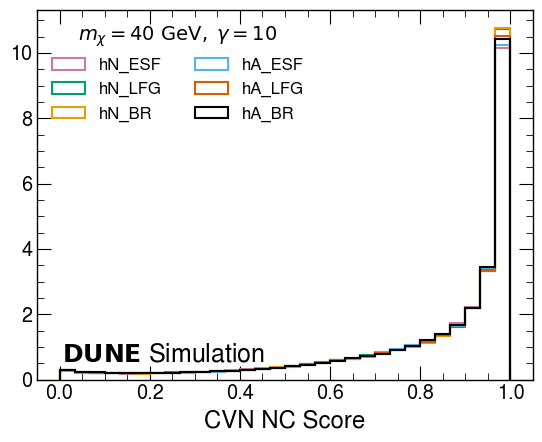

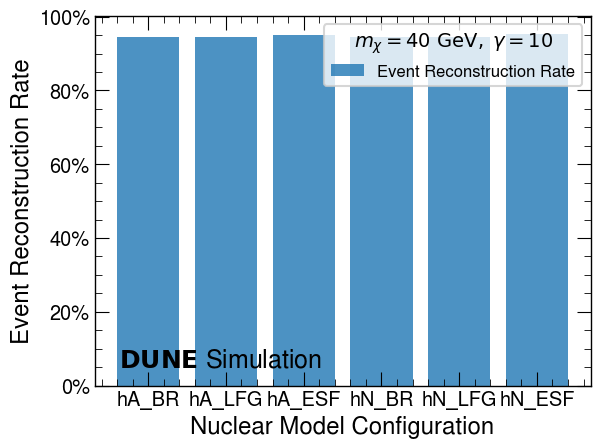

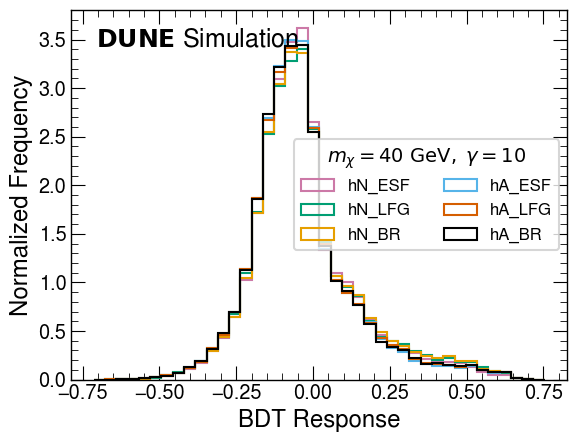

                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml.
                         : Reading weight file: /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTAtmCCNC_202503120817" of type: "BDT"
                         : Rebuilding Dataset Default
                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml.
                         : Reading weight file: /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLim

In [20]:

for SAMPLE_INDEX in range(0,12):
    #print(LIST_NUCLEARMODELS)
### Select the sample ####
    infiles_list = ReadNuclearModelSamples(True, listsamples[SAMPLE_INDEX])
    print(LIST_NUCLEARMODELS)
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
    simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]
    reco_selection = [lambda arg=index: reco_entries[arg]()/simu_entries[arg]() for index in range(0,len(LIST_NUCLEARMODELS))]
    bdt_response = [lambda arg=intree: GetBDTResponse(arg.Get("ana/Atm"),"/home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml") for intree in infiles_list]

    CosSun_Signal = [lambda arg=intree: GetNpArraysFromTrees2(arg(),"DiffCosAngleTotalMom") for intree in intrees_reco]
    fig, ax = plt.subplots()
    plt.hist([f() for f in CosSun_Signal], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
    plt.xlabel(r'$cos(\theta_{Sun})$')
    plt.ylabel('Normalized Frequency')
    #plt.ylim([0.0,1.5])
    plt.legend(ncols = 2,  title = list_samples_latex[SAMPLE_INDEX], title_fontsize=14)
    dunestyle.Simulation(0.05,0.1)
    plt.savefig('NuclearModels/CosTheta_wrt_Sun_'+listsamples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/CosTheta_wrt_Sun_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    CVN_NCScore = [lambda arg=intree: GetNpArraysFromTrees(arg(),"CVN_NCScore") for intree in intrees_reco]
    fig, ax = plt.subplots()
    plt.bar(LIST_NUCLEARMODELS,[(f()[f()<0].size/f().size)*100 for f in CVN_NCScore], label="RecoEvent Rate w/o CVN Score", color = 'tab:blue',alpha = 0.8)
    plt.legend(ncols = 2, title = list_samples_latex[SAMPLE_INDEX], title_fontsize=14, frameon= True)
    plt.xlabel('Nuclear Model Configuration')
    plt.ylabel('Rate of RecoEvents w/o CVN Score')
    #plt.ylim([0.0,120])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    dunestyle.Simulation(0.05,0.05)
    plt.savefig('NuclearModels/Rate_CVN_NoScore_'+listsamples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/Rate_CVN_NoScore_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    fig, ax = plt.subplots()
    plt.hist([f()[f()>0] for f in CVN_NCScore], bins = 30, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
    plt.legend(ncols = 2, title = list_samples_latex[SAMPLE_INDEX], title_fontsize=14)
    plt.xlabel('CVN NC Score')
    dunestyle.Simulation(0.05,0.05)
    plt.savefig('NuclearModels/CVN_NC_Score_'+listsamples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/CVN_NC_Score_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(LIST_NUCLEARMODELS,[f()*100 for f in reco_selection], label="Event Reconstruction Rate", color = 'tab:blue',alpha = 0.8)
    plt.legend(title = list_samples_latex[SAMPLE_INDEX], title_fontsize = 14, frameon= True)
    plt.xlabel('Nuclear Model Configuration')
    plt.ylabel("Event Reconstruction Rate")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    dunestyle.Simulation(0.05,0.05)
    plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_'+listsamples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()
    
    
    fig, ax = plt.subplots()
    plt.hist([f() for f in bdt_response], label= [l for l in LIST_NUCLEARMODELS], bins =40, histtype='step', density =1)
    plt.xlabel('BDT Response')
    plt.ylabel("Normalized Frequency")
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    dunestyle.Simulation()
    plt.legend(title = list_samples_latex[SAMPLE_INDEX], ncols=2,title_fontsize = 14, frameon= True)
    plt.savefig('NuclearModels/BDT_Response_'+listsamples[SAMPLE_INDEX]+'.png', format='png', dpi=300)
    plt.savefig('NuclearModels/BDT_Response_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()


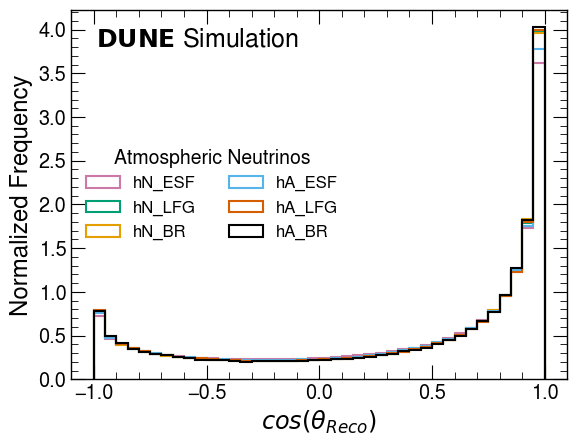

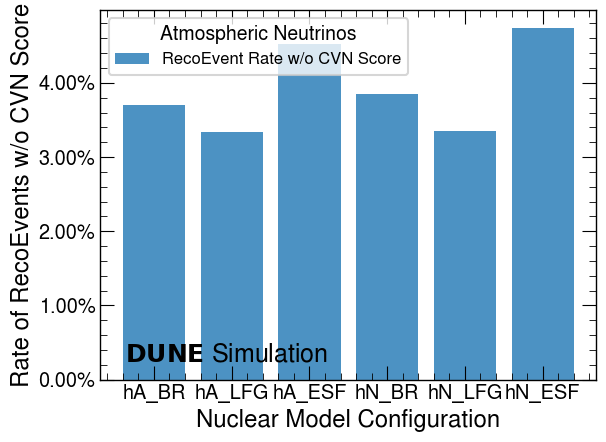

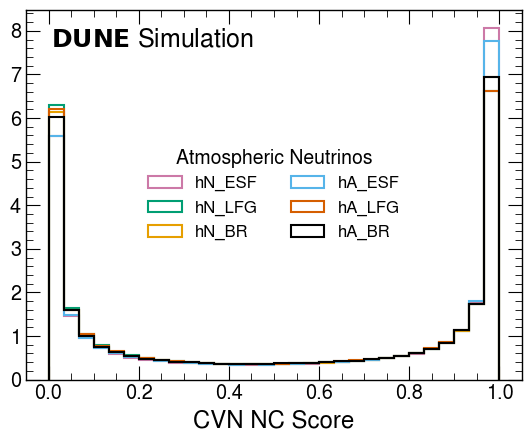

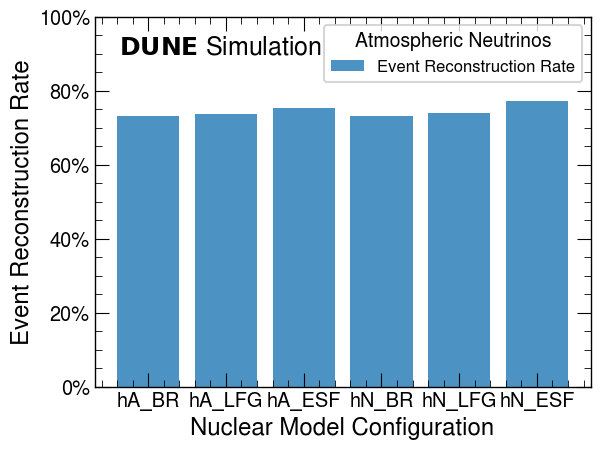

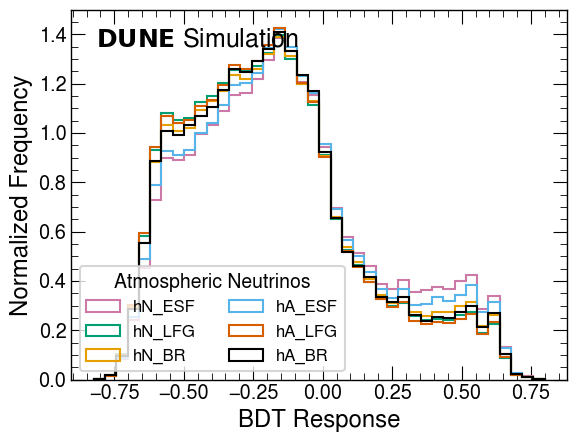

                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml.
                         : Reading weight file: /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTAtmCCNC_202503120817" of type: "BDT"
                         : Rebuilding Dataset Default
                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml.
                         : Reading weight file: /home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLim

In [43]:
### Select the sample ####
infiles_list = ReadNuclearModelSamples(False)
intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]
reco_selection = [lambda arg=index: reco_entries[arg]()/simu_entries[arg]() for index in range(0,6)]
bdt_response = [lambda arg=intree: GetBDTResponse(arg.Get("ana/Atm"),"/home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202503120817.weights.xml") for intree in infiles_list]


CosSun_Signal = [lambda arg=intree: GetNpArraysFromTrees2(arg(),"DiffCosAngleTotalMom") for intree in intrees_reco]
fig, ax = plt.subplots()
plt.hist([f() for f in CosSun_Signal], bins = 40, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
plt.xlabel(r'$cos(\theta_{Reco})$')
plt.ylabel('Normalized Frequency')
#plt.ylim([0.0,1.5])
plt.legend(ncols = 2,  title = 'Atmospheric Neutrinos', title_fontsize=14)
dunestyle.Simulation()
plt.savefig('NuclearModels/CosTheta_wrt_Sun_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/CosTheta_wrt_Sun_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

CVN_NCScore = [lambda arg=intree: GetNpArraysFromTrees(arg(),"CVN_NCScore") for intree in intrees_reco]
fig, ax = plt.subplots()
plt.bar(LIST_NUCLEARMODELS,[(f()[f()<0].size/f().size)*100 for f in CVN_NCScore], label="RecoEvent Rate w/o CVN Score", color = 'tab:blue',alpha = 0.8)
plt.legend(ncols = 2, title = 'Atmospheric Neutrinos', title_fontsize=14, frameon= True)
plt.xlabel('Nuclear Model Configuration')
plt.ylabel('Rate of RecoEvents w/o CVN Score')
#plt.ylim([0.0,120])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
dunestyle.Simulation(0.05,0.05)
plt.savefig('NuclearModels/Rate_CVN_NoScore_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/Rate_CVN_NoScore_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots()
plt.hist([f()[f()>0] for f in CVN_NCScore], bins = 30, histtype = 'step', label= [l for l in LIST_NUCLEARMODELS], density=1)
plt.legend(ncols = 2, title = 'Atmospheric Neutrinos', title_fontsize=14)
plt.xlabel('CVN NC Score')
dunestyle.Simulation()
plt.savefig('NuclearModels/CVN_NC_Score_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/CVN_NC_Score_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots()
plt.bar(LIST_NUCLEARMODELS,[f()*100 for f in reco_selection], label="Event Reconstruction Rate", color = 'tab:blue',alpha = 0.8)
plt.legend(title = 'Atmospheric Neutrinos', title_fontsize = 14, frameon= True)
plt.xlabel('Nuclear Model Configuration')
plt.ylabel("Event Reconstruction Rate")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim([0,100])
dunestyle.Simulation()
plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_AtmosphericsNu.png', format='png', dpi=300)
plt.savefig('NuclearModels/RateReconstruction_CVN_NoScore_AtmosphericsNu.pdf', format='pdf', dpi=300)
plt.show()

fig, ax = plt.subplots()
plt.hist([f() for f in bdt_response], label= [l for l in LIST_NUCLEARMODELS], bins =40, histtype='step', density =1)
plt.xlabel('BDT Response')
plt.ylabel("Normalized Frequency")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
dunestyle.Simulation()
plt.legend(title = 'Atmospheric Neutrinos', ncols=2,title_fontsize = 14, frameon= True)
plt.savefig('NuclearModels/BDT_Response_Atmospheric_Neutrinos.png', format='png', dpi=300)
plt.savefig('NuclearModels/BDT_Response_Atmospheric_Neutrinos.pdf', format='pdf', dpi=300)
plt.show()



In [42]:
numberevents =open("NumberOfEvents.txt","a")
for SAMPLE_INDEX in range(0,12):
    #print(LIST_NUCLEARMODELS)
### Select the sample ####
    infiles_list = ReadNuclearModelSamples(True, listsamples[SAMPLE_INDEX])
    numberevents.write(listsamples[SAMPLE_INDEX]+'\n')
    print(LIST_NUCLEARMODELS)
    reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
    simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]
    
    for idx,(s,r) in enumerate(zip(simu_entries,reco_entries)):
        evts = np.array([s(),r()])
        print(evts)
        numberevents.write('\n'+LIST_NUCLEARMODELS[idx]+'\n')
        np.savetxt(numberevents, evts.flatten(), fmt="%.1f", newline = " ",delimiter=', ')
    numberevents.write('\n')
    numberevents.write('\n')

numberevents.close()

['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[100000   7795]
[100000   6775]
[99800 14952]
[99800  5123]
[100000   3670]
[86400 23090]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[99600 70744]
[99600 70596]
[99600 72665]
[67400 47728]
[95200 67090]
[70200 54049]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[95000 88694]
[77000 72116]
[89000 83716]
[82000 76581]
[86600 80950]
[91600 86673]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[100000   9450]
[97600  8078]
[99800 16528]
[95078  6001]
[95800  4383]
[99800 28331]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[99200 72025]
[99600 72760]
[99400 74571]
[51800 37631]
[44000 31787]
[99400 78068]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[96000 90337]
[96600 90807]
[73200 69288]
[75600 71057]
[68200 64096]
[95800 91054]
['hA_BR', 'hA_LFG', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']
[100000  10034]
[99400  9013]
[95800 16920]
[71400  4863]
[87400  4409]
[75

In [44]:
numberevents =open("NumberOfEvents_atmospherics.txt","a")
### Select the sample ####
infiles_list = ReadNuclearModelSamples(False)
reco_entries = [lambda arg=intree: arg.Get("ana/Atm").GetEntries() for intree in infiles_list]
simu_entries = [lambda arg=intree: arg.Get("ana/AllEvents").GetEntries() for intree in infiles_list]

for idx,(s,r) in enumerate(zip(simu_entries,reco_entries)):
    evts = np.array([s(),r()])
    print(evts)
    numberevents.write('\n'+LIST_NUCLEARMODELS[idx]+'\n')
    np.savetxt(numberevents, evts.flatten(), fmt="%.1f", newline = " ",delimiter=', ')
numberevents.close()




[301000 220573]
[1928050 1420286]
[1377069 1037529]
[1532499 1123411]
[1517142 1122218]
[1437533 1111390]
